In [136]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
data = pd.read_csv("Copper_Set.csv")
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Data Type Manipulations

In [140]:
# Date is in the format of year month and date - the format should be %y %m %d
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [141]:
# As the 'id' column is unique identifier for every column, it is transaction id- we can remove for now
data.drop('id', axis=1, inplace=True ) 

In [142]:
# 'quantity tons' should be numeric, but it is in 'object' type. so, conver it to numeric
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors= 'coerce')

In [146]:
# 'country', 'status', 'status','application', 'product_ref','customer' are categorial columns, so transform them
data['customer'] = data['customer'].astype('category')
data['country'] = data['country'].astype('category')
data['status'] = data['status'].astype('category')
data['item type'] = data['item type'].astype('category')
data['application'] = data['application'].astype('category')#
data['product_ref'] = data['product_ref'].astype('category')

In [147]:
# calculate the time gap between the order and delivery date
data['duration'] = (data['delivery date'] - data['item_date']).dt.days

## Data Abnormalities

In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5874.925754,2.349081e+06,-2000.00,10.970298,30.364635,67.160612,1.000000e+09
thickness,181672.0,2.564827,6.572321e+00,0.18,0.700000,1.500000,3.000000,2.500000e+03
width,181673.0,1295.286724,2.616318e+02,1.00,1180.000000,1250.000000,1500.000000,2.990000e+03
selling_price,181672.0,1918.035505,3.317956e+05,-1160.00,669.000000,812.000000,953.000000,1.000010e+08
duration,181667.0,59.991231,4.681328e+01,-689.00,28.000000,59.000000,97.000000,4.480000e+02


In [149]:
# In quantity tons and selling_price, some values are negative, but they shouldn't be
# replace the negative values with NaN

data['quantity tons'] = data['quantity tons'].apply(lambda x : np.NAN if x <=0 else x)
data['selling_price'] = data['selling_price'].apply(lambda x : np.NAN if x <=0 else x)

In [150]:
# deleting the rows with negative duration, as the duration can not be nagative

data.drop(index= data[data['duration'] < 0].index, inplace=True)

In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,165563.0,6134.262857,2.457640e+06,0.00001,11.38167,30.541302,67.051232,1.000000e+09
thickness,165565.0,2.622289,6.841273e+00,0.18000,0.74000,1.500000,3.000000,2.500000e+03
width,165566.0,1300.924220,2.620145e+02,1.00000,1180.00000,1250.000000,1500.000000,2.990000e+03
selling_price,165558.0,1427.590524,2.457683e+05,0.10000,677.00000,817.000000,958.000000,1.000010e+08
duration,165560.0,68.099070,3.928420e+01,0.00000,35.00000,65.000000,101.000000,4.480000e+02


## Handling Null values

In [152]:
data.isnull().sum()

item_date            3
quantity tons        3
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     72462
product_ref          0
delivery date        3
selling_price        8
duration             6
dtype: int64

In [153]:
# In the material_ref column, there are 42% null values and many values which started with zeros should be replaced with 
# null ( as prescribed in the ducumentation), we should drop that column. Even though that column is important, we 
# need , subject expect what we should do with the column missing. So, for now I am dropping that

data.drop('material_ref', axis=1, inplace= True)

In [154]:
# for the numeric columns, replace the null with mean

for column in data.select_dtypes('float').columns:
    data[column] = data[column].fillna(data[column].mean())

In [155]:
# for categorical columns, replace them with mode

for column in data.select_dtypes('category').columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [156]:
# drop the null rows in the datetime columns
data.dropna(inplace=True)

In [157]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
duration         0
dtype: int64

## Handling Skewness and outliers

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      165560 non-null  datetime64[ns]
 1   quantity tons  165560 non-null  float64       
 2   customer       165560 non-null  float64       
 3   country        165560 non-null  float64       
 4   status         165560 non-null  object        
 5   item type      165560 non-null  object        
 6   application    165560 non-null  float64       
 7   thickness      165560 non-null  float64       
 8   width          165560 non-null  float64       
 9   product_ref    165560 non-null  int64         
 10  delivery date  165560 non-null  datetime64[ns]
 11  selling_price  165560 non-null  float64       
 12  duration       165560 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1), object(2)
memory usage: 17.7+ MB


In [159]:
data.select_dtypes('float')

,quantity tons,customer,country,application,thickness,width,selling_price,duration
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,854.0,91.0
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1047.0,0.0
5,225.790676,30202938.0,25.0,41.0,1.50,1265.0,983.0,0.0
6,3.522613,30209509.0,30.0,41.0,0.38,1125.0,18.0,91.0
8,69.071853,30341428.0,38.0,10.0,0.60,1275.0,1363.0,91.0
...,...,...,...,...,...,...,...,...
181433,32.216122,30227718.0,25.0,15.0,6.00,2000.0,552.0,30.0
181525,66.431473,30161559.0,30.0,10.0,3.85,1525.0,458.0,30.0
181527,63.859521,30161559.0,30.0,10.0,5.85,1525.0,457.0,30.0
181529,56.028562,30161559.0,30.0,10.0,7.85,1500.0,458.0,30.0


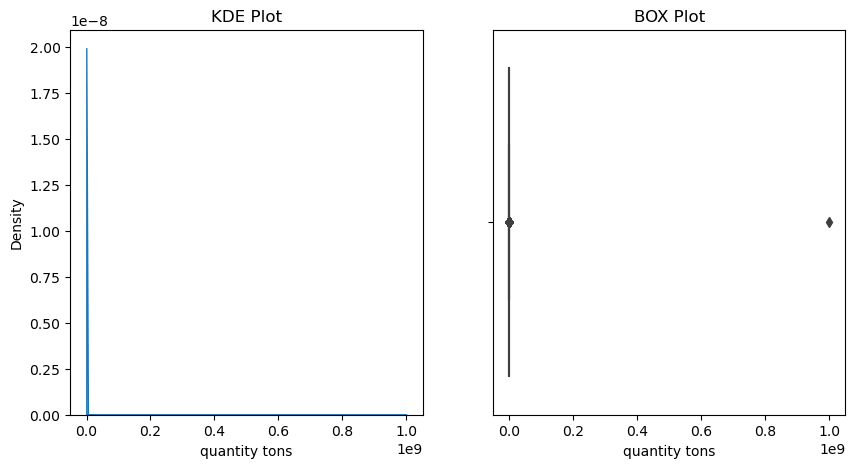

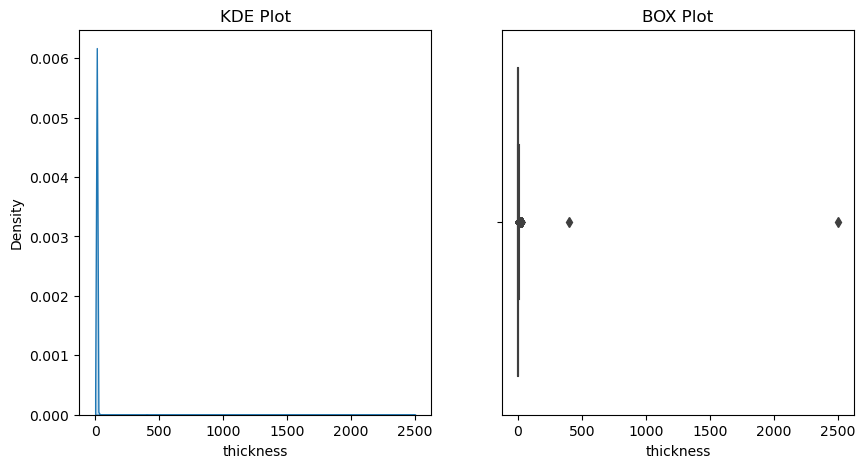

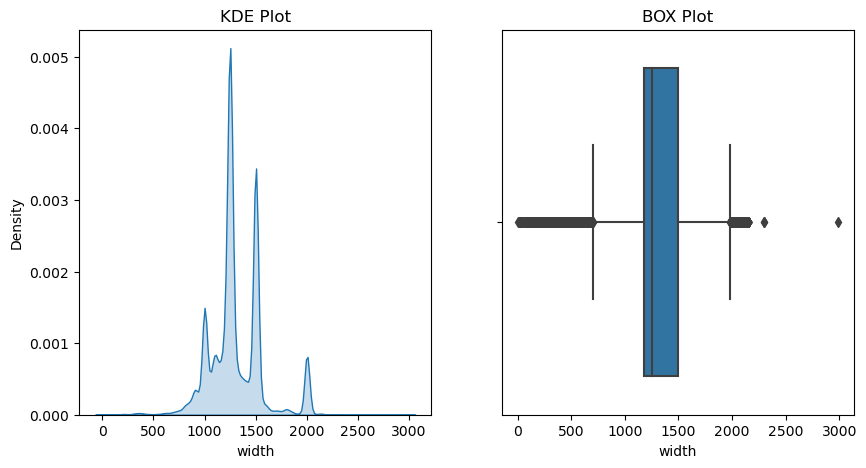

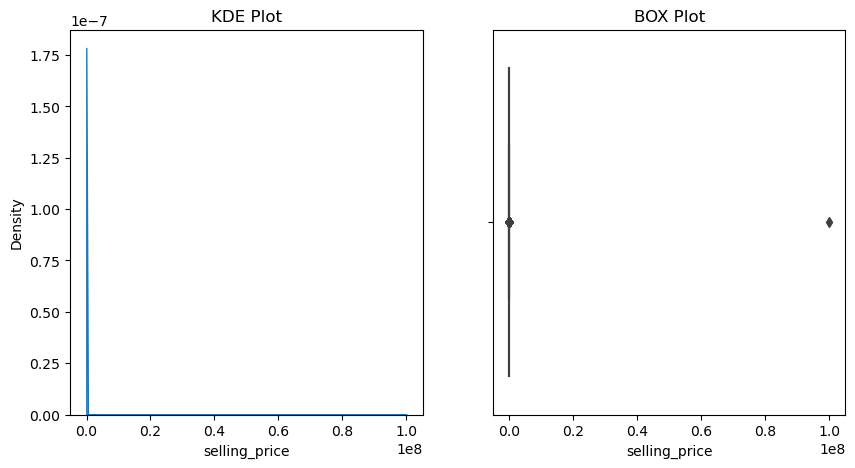

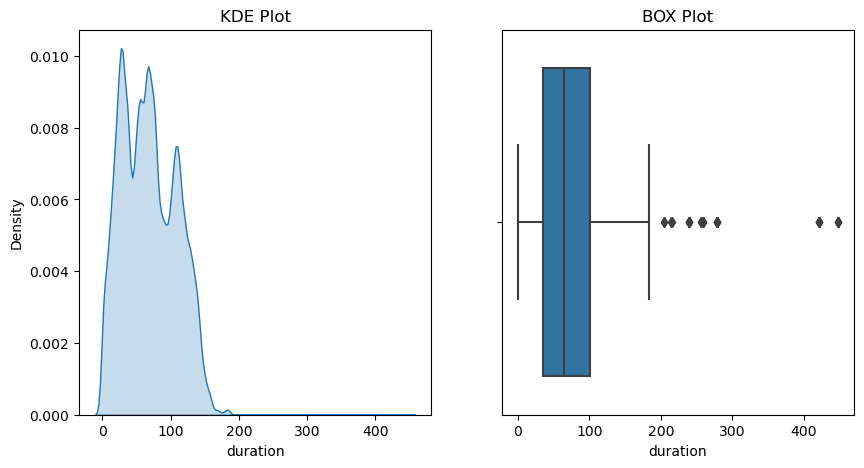

In [22]:
for col in data.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[col], shade=True)
    plt.title("KDE Plot")

    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title("BOX Plot")
    plt.show()

In [23]:
def outliers(data, column):
    iqr = data[column].quantile(0.75)-data[column].quantile(0.25)
    upper_threshold = data[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = data[column].quantile(0.25) - (1.5*iqr)
    data[column] = data[column].clip(lower_threshold,upper_threshold)

In [24]:
data.select_dtypes('float').columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'duration'], dtype='object')

In [25]:
for col in data.select_dtypes('float').columns:
    outliers(data,col)

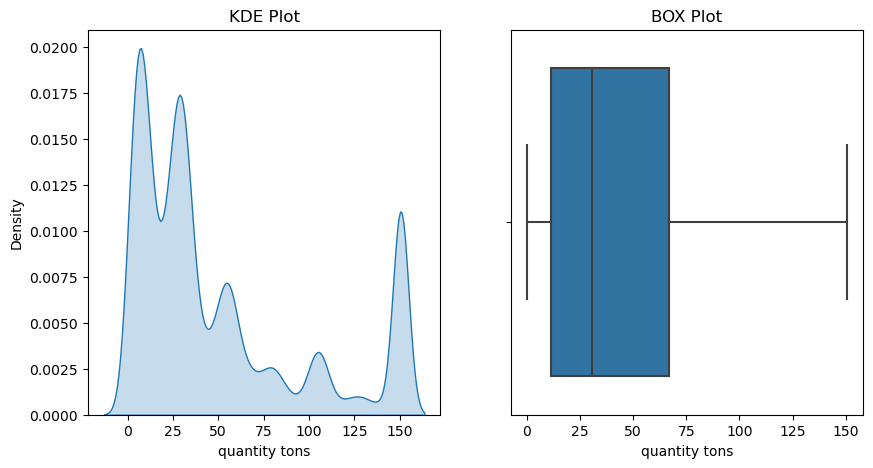

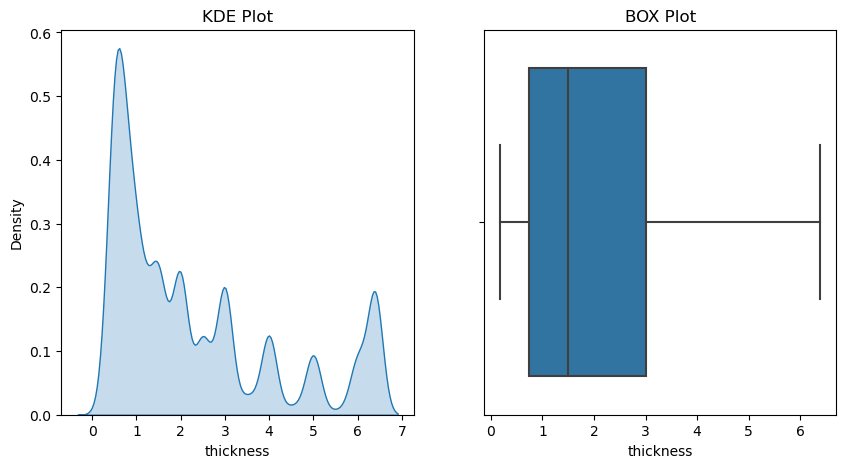

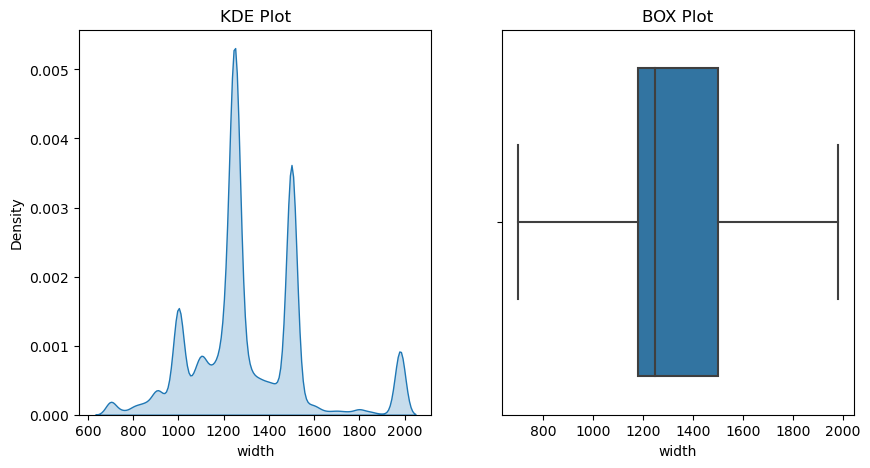

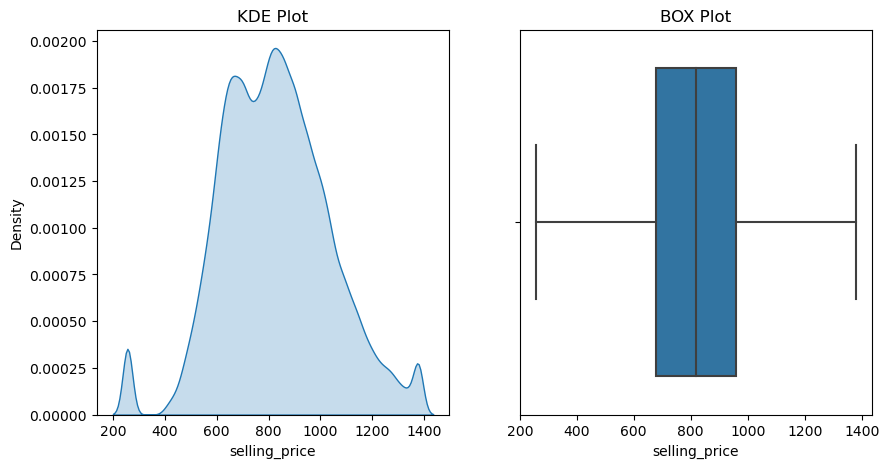

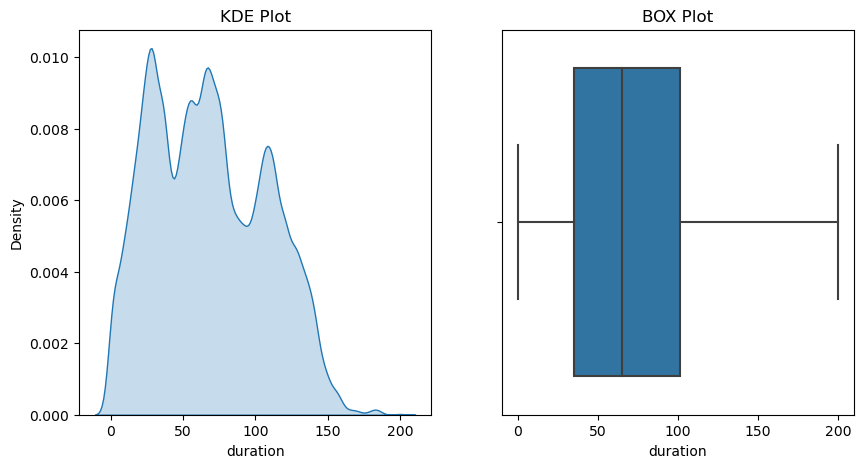

In [26]:
for col in data.select_dtypes('float'):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[col], shade=True)
    plt.title("KDE Plot")

    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title("BOX Plot")
    plt.show()

## Correlation Checking

<AxesSubplot:>

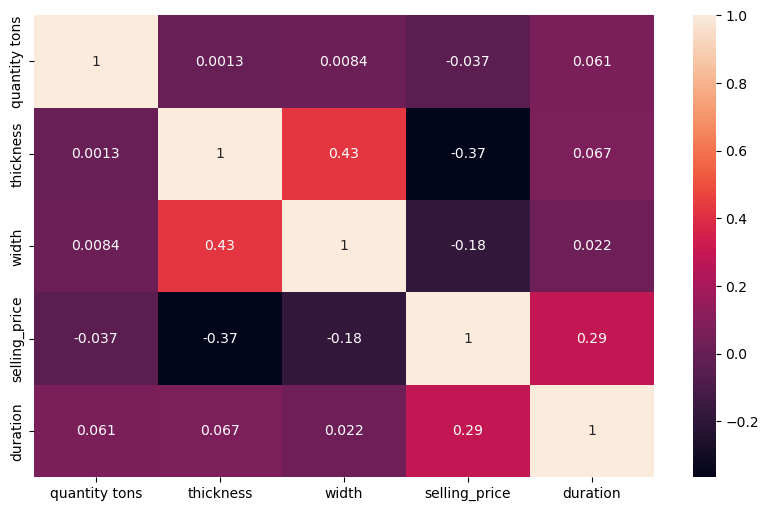

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

## Encoding

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      165560 non-null  datetime64[ns]
 1   quantity tons  165560 non-null  float64       
 2   customer       165560 non-null  category      
 3   country        165560 non-null  category      
 4   status         165560 non-null  category      
 5   item type      165560 non-null  category      
 6   application    165560 non-null  category      
 7   thickness      165560 non-null  float64       
 8   width          165560 non-null  float64       
 9   product_ref    165560 non-null  category      
 10  delivery date  165560 non-null  datetime64[ns]
 11  selling_price  165560 non-null  float64       
 12  duration       165560 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(5)
memory usage: 11.3 MB


In [29]:
data.drop(['item_date', 'delivery date'], axis=1, inplace=True)

In [30]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,duration
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,91.0
1,150.562124,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.0,0.0
5,150.562124,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,983.0,0.0
6,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,255.5,91.0
8,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,91.0


In [133]:
data.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'duration'],
      dtype='object')

In [129]:
# Random forest
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import FunctionTransformer
import numpy as np 

ft = FunctionTransformer(np.log1p, validate=True)

kf = KFold(n_splits=5)
cat_cols = data.select_dtypes('category').columns

ft = FunctionTransformer(np.log1p)
ord = OrdinalEncoder()
le = LabelEncoder()
ct = make_column_transformer(
    (ord , ['customer', 'country', 'application', 'product_ref','status', 'item type']),
    (ft,['quantity tons','thickness','duration'])
    , remainder='passthrough')
ct.set_output(transform='pandas')
data_ct = ct.fit_transform(data.drop('selling_price', axis=1))
data_ct

,ordinalencoder__customer,ordinalencoder__country,ordinalencoder__application,ordinalencoder__product_ref,ordinalencoder__status,ordinalencoder__item type,functiontransformer__quantity tons,functiontransformer__thickness,functiontransformer__duration,remainder__width
0,49.0,3.0,4.0,22.0,7.0,5.0,4.010077,1.098612,4.521789,1500.0
1,285.0,0.0,17.0,20.0,7.0,5.0,5.020996,0.587787,0.000000,1210.0
5,285.0,0.0,17.0,20.0,7.0,5.0,5.020996,0.916291,0.000000,1265.0
6,360.0,4.0,17.0,2.0,0.0,5.0,1.509090,0.322083,4.521789,1125.0
8,860.0,6.0,4.0,18.0,7.0,3.0,4.249521,0.470004,4.521789,1275.0
...,...,...,...,...,...,...,...,...,...,...
181433,473.0,0.0,5.0,8.0,1.0,3.0,3.503035,1.945910,3.433987,1980.0
181525,95.0,4.0,4.0,8.0,1.0,3.0,4.211112,1.578979,3.433987,1525.0
181527,95.0,4.0,4.0,8.0,1.0,3.0,4.172224,1.924249,3.433987,1525.0
181529,95.0,4.0,4.0,8.0,1.0,3.0,4.043552,2.000128,3.433987,1500.0


In [161]:
pd.DataFrame([[54.151139,'30156308.0','28.0','Won','W','10.0',2.00,1500.0,'1670798778',91.0]], 
                    columns=['quantity tons', 'customer', 'country', 'status', 'item type',
                             'application', 'thickness', 'width', 'product_ref', 'duration'])

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,duration
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,91.0


In [166]:
input = pd.DataFrame([[54.151139, 30156308.0, 28.0, 'Won', 'W', 10.0, 2.00 ,1500.0 ,1670798778 ,91.0]], 
                    columns=['quantity tons', 'customer', 'country', 'status', 'item type',
                             'application', 'thickness', 'width', 'product_ref', 'duration'])
input['customer'] = input['customer'].astype('category')
input['country'] = input['country'].astype('category')
input['status'] = input['status'].astype('category')
input['item type'] = input['item type'].astype('category')
input['application'] = input['application'].astype('category')#
input['product_ref'] = input['product_ref'].astype('category')

#Index(['quantity tons', 'customer', 'country', 'status', 'item type','application', 'thickness', 'width', 'product_ref', 'selling_price','duration']

input_ct = ct.transform(input)

In [167]:
rfr120.predict(input_ct)

array([815.19166667])

In [171]:
import pickle
with open("transformer.pkl", 'wb') as f:
    pickle.dump(ct,f)

In [172]:
with open("reg_model.pkl", 'wb') as f:
    pickle.dump(rfr120,f)

In [83]:
rfr = RandomForestRegressor()

rcv = RandomizedSearchCV(
    rfr, 
    param_distributions={'n_estimators': [80,100,120]}, 
    cv=kf)
rcv.fit(X=data_ct.drop('remainder__selling_price', axis=1),  y=data_ct['remainder__selling_price'])

print(rcv.best_params_)
print(rcv.best_score_)

{'n_estimators': 120}
0.12020980649336965


In [88]:
print(rcv.scoring)

None


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

rfr80 = RandomForestRegressor(n_estimators=80)
rfr80.fit(X=data_ct.drop('remainder__selling_price', axis=1),  y=data_ct['remainder__selling_price'])
print(mean_squared_error(y_true= data_ct['remainder__selling_price'].values , y_pred= rfr80.predict(data_ct.drop('remainder__selling_price', axis=1))))
print(r2_score(y_true= data_ct['remainder__selling_price'].values , y_pred= rfr80.predict(data_ct.drop('remainder__selling_price', axis=1))))

441.70514425347807
0.9897859290412057


In [90]:
from sklearn.metrics import mean_squared_error, r2_score

rfr100 = RandomForestRegressor(n_estimators=100)
rfr100.fit(X=data_ct.drop('remainder__selling_price', axis=1),  y=data_ct['remainder__selling_price'])
print(mean_squared_error(y_true= data_ct['remainder__selling_price'].values , y_pred= rfr100.predict(data_ct.drop('remainder__selling_price', axis=1))))
print(r2_score(y_true= data_ct['remainder__selling_price'].values , y_pred= rfr100.predict(data_ct.drop('remainder__selling_price', axis=1))))

437.74342308089626
0.9898775406099234


In [130]:
from sklearn.metrics import mean_squared_error, r2_score

rfr120 = RandomForestRegressor(n_estimators=120)
rfr120.fit(X=data_ct,  y=data['selling_price'])
print(mean_squared_error(y_true= data['selling_price'].values , y_pred= rfr120.predict(data_ct)))
print(r2_score(y_true= data['selling_price'].values , y_pred= rfr120.predict(data_ct)))

435.07648224350515
0.9899392114401376


In [64]:
from pycaret.regression import *

setup(data_ct, target='remainder__selling_price')

,Description,Value
0,Session id,2650
1,Target,remainder__selling_price
2,Target type,Regression
3,Original data shape,"(165560, 11)"
4,Transformed data shape,"(165560, 11)"
5,Transformed train set shape,"(115891, 11)"
6,Transformed test set shape,"(49669, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [65]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:04:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,35.8896,3546.3739,59.5453,0.9180,0.0697,0.0435,20.7880
rf,Random Forest Regressor,36.7612,3579.0144,59.8209,0.9172,0.0695,0.0441,29.1500
dt,Decision Tree Regressor,43.1560,6454.7018,80.3230,0.8507,0.0938,0.0517,0.4120
xgboost,Extreme Gradient Boosting,61.9486,6878.3267,82.9339,0.8409,0.1013,0.0773,0.6090
catboost,CatBoost Regressor,65.6101,7457.4097,86.3531,0.8275,0.1058,0.0820,12.5540
lightgbm,Light Gradient Boosting Machine,75.1921,9361.6496,96.7522,0.7835,0.1180,0.0939,0.9220
gbr,Gradient Boosting Regressor,93.1577,13492.0620,116.1533,0.6879,0.1429,0.1176,7.9650
knn,K Neighbors Regressor,88.3329,15830.2966,125.8064,0.6339,0.1712,0.1193,0.3370
ada,AdaBoost Regressor,118.4773,20337.7410,142.5920,0.5295,0.1842,0.1590,2.4590
br,Bayesian Ridge,136.8309,31318.8467,176.9671,0.2756,0.2466,0.1968,0.0780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=2650)

# Classifier

In [97]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,duration
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,91.0
1,150.562124,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.0,0.0
5,150.562124,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,983.0,0.0
6,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,255.5,91.0
8,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,91.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   quantity tons  165560 non-null  float64 
 1   customer       165560 non-null  category
 2   country        165560 non-null  category
 3   status         165560 non-null  category
 4   item type      165560 non-null  category
 5   application    165560 non-null  category
 6   thickness      165560 non-null  float64 
 7   width          165560 non-null  float64 
 8   product_ref    165560 non-null  category
 9   selling_price  165560 non-null  float64 
 10  duration       165560 non-null  float64 
dtypes: category(6), float64(5)
memory usage: 12.8 MB


In [103]:

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import FunctionTransformer
import numpy as np 

ft = FunctionTransformer(np.log1p, validate=True)

kf = KFold(n_splits=5)

ft1 = FunctionTransformer(np.log1p)
ord1 = OrdinalEncoder()
le = LabelEncoder()
ct1 = make_column_transformer(
    (ord1 , ['customer', 'country', 'application', 'product_ref', 'item type','status']),
    (ft1,['quantity tons','thickness','duration']), 
    remainder='passthrough')
ct1.set_output(transform='pandas')
data_ct1 = ct1.fit_transform(data)
data_ct1

,ordinalencoder__customer,ordinalencoder__country,ordinalencoder__application,ordinalencoder__product_ref,ordinalencoder__item type,ordinalencoder__status,functiontransformer__quantity tons,functiontransformer__thickness,functiontransformer__duration,remainder__width,remainder__selling_price
0,49.0,3.0,4.0,22.0,5.0,7.0,4.010077,1.098612,4.521789,1500.0,854.0
1,285.0,0.0,17.0,20.0,5.0,7.0,5.020996,0.587787,0.000000,1210.0,1047.0
5,285.0,0.0,17.0,20.0,5.0,7.0,5.020996,0.916291,0.000000,1265.0,983.0
6,360.0,4.0,17.0,2.0,5.0,0.0,1.509090,0.322083,4.521789,1125.0,255.5
8,860.0,6.0,4.0,18.0,3.0,7.0,4.249521,0.470004,4.521789,1275.0,1363.0
...,...,...,...,...,...,...,...,...,...,...,...
181433,473.0,0.0,5.0,8.0,3.0,1.0,3.503035,1.945910,3.433987,1980.0,552.0
181525,95.0,4.0,4.0,8.0,3.0,1.0,4.211112,1.578979,3.433987,1525.0,458.0
181527,95.0,4.0,4.0,8.0,3.0,1.0,4.172224,1.924249,3.433987,1525.0,457.0
181529,95.0,4.0,4.0,8.0,3.0,1.0,4.043552,2.000128,3.433987,1500.0,458.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rcvc = RandomizedSearchCV(
    rfr, 
    param_distributions={'n_estimators': [80,100,120]}, 
    cv=kf,
    scoring='accuracy')
rcvc.fit(X=data_ct1.drop('ordinalencoder__status', axis=1),  y=data_ct1['ordinalencoder__status'])

print(rcvc.best_params_)
print(rcvc.best_score_)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc120 = RandomForestClassifier(n_estimators=120)
rfc120.fit(X=data_ct1.drop('ordinalencoder__status', axis=1),  y=data_ct1['ordinalencoder__status'])
print(classification_report(y_true=data_ct1['ordinalencoder__status'], y_pred=rfc120.predict(data_ct1.drop('ordinalencoder__status', axis=1))))

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      2742\n         1.0       1.00      1.00      1.00     33807\n         2.0       1.00      1.00      1.00     18830\n         3.0       1.00      1.00      1.00         9\n         4.0       1.00      1.00      1.00        53\n         5.0       1.00      1.00      1.00      4070\n         6.0       1.00      1.00      1.00      4066\n         7.0       1.00      1.00      1.00    101982\n         8.0       1.00      1.00      1.00         1\n\n    accuracy                           1.00    165560\n   macro avg       1.00      1.00      1.00    165560\nweighted avg       1.00      1.00      1.00    165560\n'

In [116]:
print(classification_report(y_true=data_ct1['ordinalencoder__status'], y_pred=rfc120.predict(data_ct1.drop('ordinalencoder__status', axis=1))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2742
         1.0       1.00      1.00      1.00     33807
         2.0       1.00      1.00      1.00     18830
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        53
         5.0       1.00      1.00      1.00      4070
         6.0       1.00      1.00      1.00      4066
         7.0       1.00      1.00      1.00    101982
         8.0       1.00      1.00      1.00         1

    accuracy                           1.00    165560
   macro avg       1.00      1.00      1.00    165560
weighted avg       1.00      1.00      1.00    165560



In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc120 = RandomForestClassifier(n_estimators=100)
rfc120.fit(X=data_ct1.drop('ordinalencoder__status', axis=1),  y=data_ct1['ordinalencoder__status'])
print(classification_report(y_true=data_ct1['ordinalencoder__status'], y_pred=rfc120.predict(data_ct1.drop('ordinalencoder__status', axis=1))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2742
         1.0       1.00      1.00      1.00     33807
         2.0       1.00      1.00      1.00     18830
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        53
         5.0       1.00      1.00      1.00      4070
         6.0       1.00      1.00      1.00      4066
         7.0       1.00      1.00      1.00    101982
         8.0       1.00      1.00      1.00         1

    accuracy                           1.00    165560
   macro avg       1.00      1.00      1.00    165560
weighted avg       1.00      1.00      1.00    165560



In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc50 = RandomForestClassifier(n_estimators=50)
rfc50.fit(X=data_ct1.drop('ordinalencoder__status', axis=1),  y=data_ct1['ordinalencoder__status'])
print(classification_report(y_true=data_ct1['ordinalencoder__status'], y_pred=rfc50.predict(data_ct1.drop('ordinalencoder__status', axis=1))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2742
         1.0       1.00      1.00      1.00     33807
         2.0       1.00      1.00      1.00     18830
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        53
         5.0       1.00      1.00      1.00      4070
         6.0       1.00      1.00      1.00      4066
         7.0       1.00      1.00      1.00    101982
         8.0       1.00      1.00      1.00         1

    accuracy                           1.00    165560
   macro avg       1.00      1.00      1.00    165560
weighted avg       1.00      1.00      1.00    165560



In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc120 = RandomForestClassifier(n_estimators=10)
rfc120.fit(X=data_ct1.drop('ordinalencoder__status', axis=1),  y=data_ct1['ordinalencoder__status'])
print(classification_report(y_true=data_ct1['ordinalencoder__status'], y_pred=rfc120.predict(data_ct1.drop('ordinalencoder__status', axis=1))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2742
         1.0       0.99      1.00      1.00     33807
         2.0       0.99      0.99      0.99     18830
         3.0       1.00      0.89      0.94         9
         4.0       1.00      1.00      1.00        53
         5.0       0.99      0.98      0.99      4070
         6.0       1.00      1.00      1.00      4066
         7.0       1.00      1.00      1.00    101982
         8.0       1.00      1.00      1.00         1

    accuracy                           1.00    165560
   macro avg       1.00      0.98      0.99    165560
weighted avg       1.00      1.00      1.00    165560



In [177]:
input = pd.DataFrame([[54.151139, 30156308.0, 28.0, 'Won', 'W', 10.0, 2.00 ,1500.0 ,1670798778 ,854.0 ,91.0]], 
                    columns=['quantity tons', 'customer', 'country', 'status', 'item type',
                             'application', 'thickness', 'width', 'product_ref','selling_price', 'duration'])
input['customer'] = input['customer'].astype('category')
input['country'] = input['country'].astype('category')
input['status'] = input['status'].astype('category')
input['item type'] = input['item type'].astype('category')
input['application'] = input['application'].astype('category')#
input['product_ref'] = input['product_ref'].astype('category')

#Index(['quantity tons', 'customer', 'country', 'status', 'item type','application', 'thickness', 'width', 'product_ref', 'selling_price','duration']

input_ct = ct1.transform(input)
input_ct

,ordinalencoder__customer,ordinalencoder__country,ordinalencoder__application,ordinalencoder__product_ref,ordinalencoder__item type,ordinalencoder__status,functiontransformer__quantity tons,functiontransformer__thickness,functiontransformer__duration,remainder__width,remainder__selling_price
0,49.0,3.0,4.0,22.0,5.0,7.0,4.010077,1.098612,4.521789,1500.0,854.0


In [189]:
status_encoded = rfc50.predict(input_ct.drop("ordinalencoder__status", axis=1))[0]

In [192]:
status_encoded = int(status_encoded)

In [193]:
ct1.named_transformers_['ordinalencoder'].categories_[5][status_encoded]

'Won'

In [174]:
with open("class_model.pkl", 'wb') as f :
    pickle.dump(rfc50,f)

In [175]:
with open("class_transformer.pkl", 'wb') as f :
    pickle.dump(ct1,f)